# Xarray Davies Reef

This first example will go through the simplest way of loading [eReefs data](http://thredds.ereefs.aims.gov.au/thredds/catalog.html) into `Xarray` and plotting variables at specific locations.


## Load the required Python libraries

First of all, load the necessary libraries. These are the ones we discussed previously:

+ numpy
+ matplotlib
+ cartopy
+ xarray

In [2]:
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

## Build multi-file dataset

We will use the `open_mfdataset` function from `xArray` to open multiple netCDF files into a single xarray Dataset. 

We will query load the GBR4km dataset from the [AIMS server](http://thredds.ereefs.aims.gov.au/thredds/catalog.html), so let's first define the base URL:

In [1]:
# For the bio dataset
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"

# For the hydro dataset
base_url2 = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

For the sake of the demonstration, we will only use 1 month:

In [4]:
month_st = 1   # Starting month 
month_ed = 1   # Ending month 
year = 2018    # Year

# Based on the server the file naming convention 
biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

### Loading dataset into xArray

Using `xArray`, we open these files into a `Dataset`:

In [5]:
ds_bio = xr.open_mfdataset(biofiles)
ds_hydro = xr.open_mfdataset(hydrofiles)
ds_bio

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 723, longitude: 491, time: 31)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31...
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables: (12/101)
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIC              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIN              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T23:07:30+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

## Find closest Xarray data to site

We will use Davies Reef position for the example.

In [7]:
reef_lat = -18.82
reef_lon = 147.64

Using the `sel` function and `nearest` method we extract the values of the variables close to our site:

In [8]:
# Alkalinity
alk = ds_bio.alk
alk = alk.sel(longitude=reef_lon, latitude=reef_lat, method='nearest')

# Mean current
mean_cur = ds_hydro.mean_cur
mean_cur = mean_cur.sel(longitude=reef_lon, latitude=reef_lat, method='nearest')
alk

<xarray.DataArray 'alk' (time: 31, k: 17)>
dask.array<getitem, shape=(31, 17), dtype=float32, chunksize=(31, 17), chunktype=numpy.ndarray>
Coordinates:
    zc         (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31T02:00:00
    latitude   float64 -18.83
    longitude  float64 147.6
Dimensions without coordinates: k
Attributes:
    short_name:   alk
    units:        mmol m-3
    long_name:    Total alkalinity
    _ChunkSizes:  [  1   1 133 491]

Let's check where the closest point is located in the eReefs dataset:

In [9]:
lat = alk.latitude.values.item(0)
lon = alk.longitude.values.item(0)

print('Nearest position: ',lon,lat)

Nearest position:  147.628788 -18.826022


We then load the `Xarray Dataset` in memory:

In [10]:
load_alk = alk.load()
load_curr = mean_cur.load()

## Plotting Xarray dataset

We will use the `Xarray` `plot` function.

:::{seealso}
Check out this [link](https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/04_plotting_and_visualization.html) to see how to use `Xarray`’s convenient matplotlib-backed plotting interface to visualize your datasets! 
:::

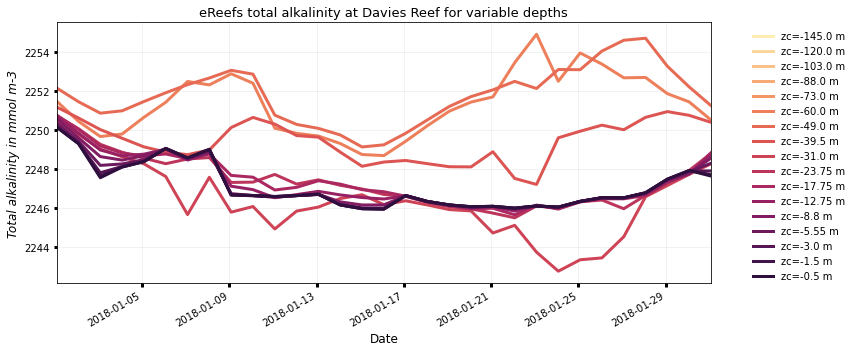

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))

n = load_alk.zc.shape[0]  # Number of z-coordinate

# Colormap from cmocean discretized based on zc number 
colors = cmocean.cm.matter(np.linspace(0,1,n))

# We use matplotlib-backed plotting interface to get
# the alkalinity evolution over time for each z-coordinate
for zc in range(n):
    load_alk.isel(k=zc).plot(ax=ax, x='time', lw=3, 
                             color=colors[zc], 
                             label='zc='+str(load_alk.zc.item(zc))+' m')

# Add legend
ax.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left', 
    fontsize=10, frameon=False
)

# Define x/y axis
ax.set_xlim(min(load_alk.time.values),max(load_alk.time.values))
ax.set_ylabel(load_alk.long_name+' in '+load_alk.units, style="italic", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

ax.grid(True, linewidth=0.5, color="k", alpha=0.1, linestyle="-")
ax.tick_params(labelcolor="k", labelsize="medium", width=3)
plt.title('eReefs total alkalinity at Davies Reef for variable depths', fontsize=13)

plt.tight_layout()

We can do the same with the other `Xarray` dataset:

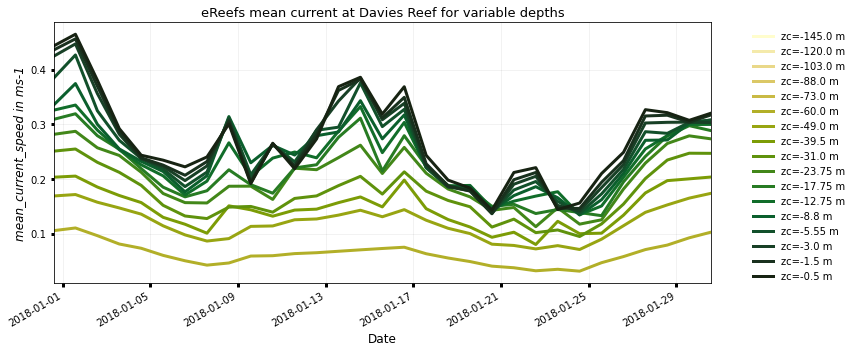

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))

n = load_curr.zc.shape[0]  # Number of z-coordinate

# Colormap from cmocean discretized based on zc number 
colors = cmocean.cm.speed(np.linspace(0,1,n))

# We use matplotlib-backed plotting interface to get
# the mean current evolution over time for each z-coordinate
for zc in range(n):
    load_curr.isel(k=zc).plot(ax=ax, x='time', lw=3, color=colors[zc], label='zc='+str(load_curr.zc.item(zc))+' m')

# Add legend
ax.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False
)

# Define x/y axis
ax.set_xlim(min(load_curr.time.values),max(load_curr.time.values))
ax.set_ylabel(load_curr.long_name+' in '+load_curr.units, style="italic", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

ax.grid(True, linewidth=0.5, color="k", alpha=0.1, linestyle="-")
ax.tick_params(labelcolor="k", labelsize="medium", width=3)
plt.title('eReefs mean current at Davies Reef for variable depths', fontsize=13)

plt.tight_layout()